In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter #function that count members of a list and return them as a dictioery


In [273]:
import requests, io
url = 'https://raw.githubusercontent.com/sraeisi/Machine_Learning_Physics_Winter20/master/Lec1/particle_mini.npz'
s=requests.get(url, stream=True).content #Downloading data
data=np.load(io.BytesIO(s)) 

# Extract X & Y
X, Y = data['X'], data['Y']
# The labels are 1 or 2. So we need to turn them into 0 and  1.
Y = (Y>1.5).astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, random_state= 0)

In [274]:
print(X_train.shape)
print( Counter(Y_train) )

(7142, 2)
Counter({np.int64(0): 4251, np.int64(1): 2891})


In [275]:
from tensorflow import keras as ks

model = ks.Sequential()
model.add(ks.layers.Dense(10, activation=ks.activations.relu, input_dim = 2)  )
model.add(ks.layers.Dense(15, activation=ks.activations.relu)  )
model.add(ks.layers.Dense(10, activation=ks.activations.relu) )
model.add(ks.layers.Dense(10, activation=ks.activations.relu) )
model.add(ks.layers.Dense(1, activation=ks.activations.sigmoid)  )


In [276]:
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_95 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 476 (1.86 KB)

 Trainable params: 476 (1.86 KB)

 Non-trainable params: 0 (0.00 B)

In [277]:
#Test the model
model.predict(X_test[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([[0.48839253],
       [0.4805832 ],
       [0.49137482]], dtype=float32)

In [278]:
#Choose loss , optimizer and metrics
model.compile( loss=ks.losses.binary_crossentropy  ,
              optimizer = ks.optimizers.SGD(.1) ,
              metrics = [ks.metrics.binary_accuracy] )


In [279]:
# Choosing training data , number og epochs , batch size and also validation sett
history = model.fit(X_train, Y_train,
                    epochs=90, batch_size=1500,
                    validation_data=(X_test, Y_test))

Epoch 1/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - binary_accuracy: 0.5961 - loss: 0.6908 - val_binary_accuracy: 0.5724 - val_loss: 0.6894
Epoch 2/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - binary_accuracy: 0.5902 - loss: 0.6858 - val_binary_accuracy: 0.5724 - val_loss: 0.6811
Epoch 3/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - binary_accuracy: 0.5953 - loss: 0.6782 - val_binary_accuracy: 0.5724 - val_loss: 0.6780
Epoch 4/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - binary_accuracy: 0.5968 - loss: 0.6744 - val_binary_accuracy: 0.5724 - val_loss: 0.6750
Epoch 5/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - binary_accuracy: 0.5991 - loss: 0.6703 - val_binary_accuracy: 0.5724 - val_loss: 0.6719
Epoch 6/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - binary_accuracy: 0.5980 - loss: 0.6670 - val_binary_accuracy: 0.5729 - val_loss: 0.6684
Epoch 7/90
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - binary_accuracy: 0.5935 - loss: 0.6635 - val_binary_accuracy: 0.5733 - val_loss: 0.6627
Epoch 8/90
5/5 ━━━━━━━━━━━━

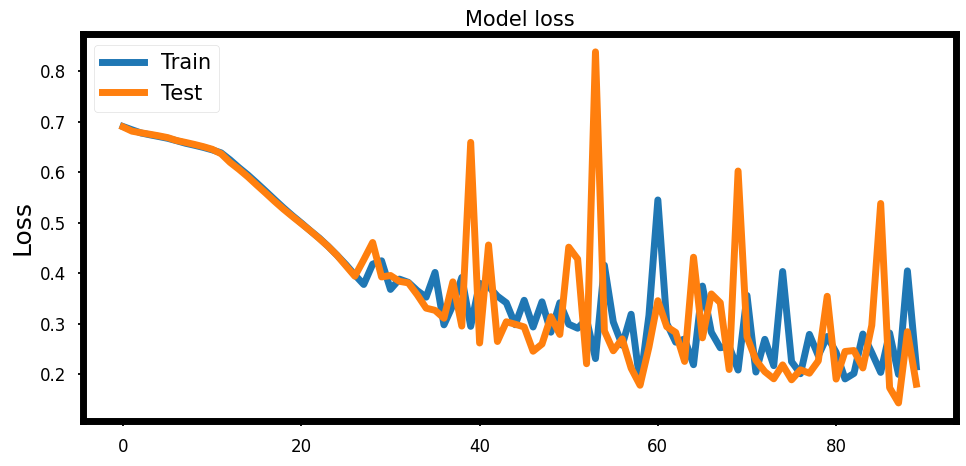

In [280]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))

# Plot training & validation loss values
ax = fig.add_subplot(1,1,1, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [281]:
#predictions of the model for test set
y_predict = (model.predict(X_test)>.5).astype(int)
#Model accuracy
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(loss)
print(accuracy)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.18041451275348663
0.9244015216827393
